# Trabajo Final - Estadística Computacional

## Tema: Análisis de la Distribución del Tiempo Diario en Redes Sociales

**Autores:** Nombre(s) del estudiante  
**Programa:** TECNOLOGÍA EN DESARROLLO DE SOFTWARE  
**Fecha:** 21 de mayo de 2025

## 1. Planteamiento del problema

Se busca determinar si el tiempo diario que los estudiantes de TECNOLOGÍA EN DESARROLLO DE SOFTWARE dedican a redes sociales sigue una distribución normal. Para ello se recolectaron datos mediante una pequeña encuesta y se aplicaron análisis estadísticos y gráficos con Python.

In [ ]:
# 2. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
# 3. Cargar y visualizar datos
df = pd.read_csv('DatosHoras.csv')  # Asegúrate de que exista este archivo
df.head()

,horas
0,3.996714
1,3.460785
2,4.147689
3,5.023030
4,3.765847


In [8]:
# 4. Análisis descriptivo
horas = df['horas']

print("Media:", horas.mean())
print("Mediana:", horas.median())
print("Moda:", horas.mode()[0])
print("Desviación estándar:", horas.std())
print("Varianza:", horas.var())

Media: 3.655836031542373
Mediana: 3.575251812
Moda: 2.698896301
Desviación estándar: 0.8409717392253919
Varianza: 0.7072334661757806


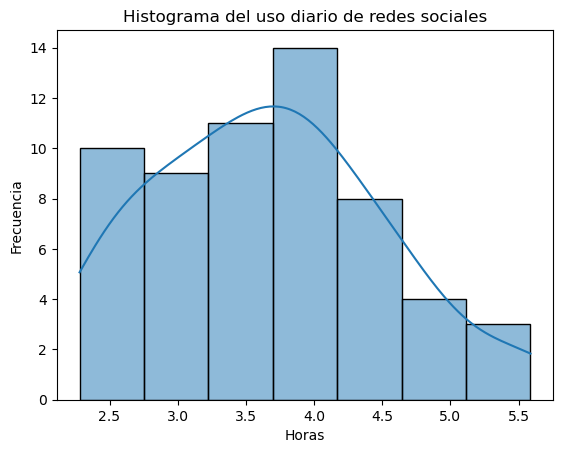

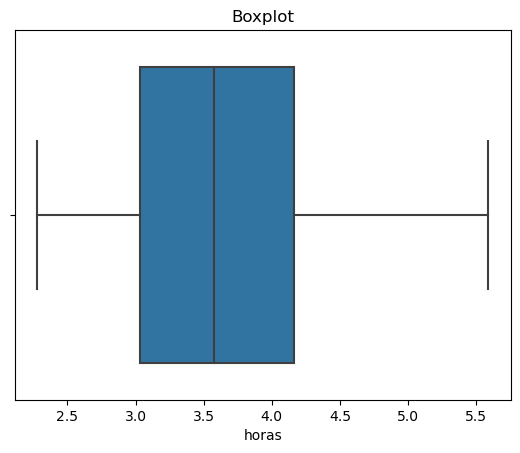

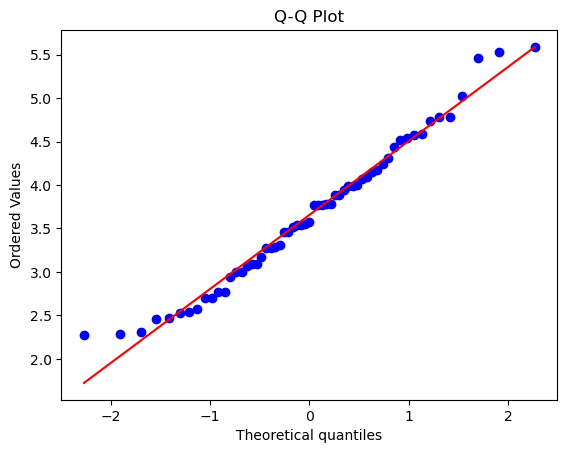

In [9]:
# 5. Visualización de datos
sns.histplot(horas, kde=True)
plt.title("Histograma del uso diario de redes sociales")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.show()

sns.boxplot(x=horas)
plt.title("Boxplot")
plt.show()

stats.probplot(horas, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

¿Cómo interpretar el QQ-plot?

- Si los puntos están aproximadamente sobre la línea diagonal (línea de referencia): Los datos se ajustan bien a una distribución normal.

- Si los puntos se alejan sistemáticamente de la línea (por ejemplo, curvándose o formando una S): Indica desviaciones de la normalidad, como:

   a. Curva hacia arriba o abajo en los extremos: datos con colas más pesadas o ligeras (mayor o menor kurtosis).
   
   b. Forma de S invertida: sesgo en los datos (asimetría). 
   
   c. Si hay puntos alejados muy lejos de la línea: Puede indicar la presencia de valores atípicos (outliers).

Casos:

- Datos normales: puntos casi sobre la línea recta.
- Datos sesgados a la derecha: puntos se desvían hacia arriba a la derecha.
- Datos sesgados a la izquierda: puntos se desvían hacia abajo a la izquierda.
- Colas pesadas: puntos se alejan mucho en los extremos.

In [10]:
# 6. Pruebas de normalidad
shapiro = stats.shapiro(horas)
print("Shapiro-Wilk Test:", shapiro)

ks = stats.kstest(horas, 'norm', args=(horas.mean(), horas.std()))
print("Kolmogorov-Smirnov Test:", ks)

Shapiro-Wilk Test: ShapiroResult(statistic=0.9733037948608398, pvalue=0.219810351729393)
Kolmogorov-Smirnov Test: KstestResult(statistic=0.05614555653874348, pvalue=0.9872422282166007, statistic_location=2.774223699, statistic_sign=1)


Shapiro-Wilk Test ¿Qué mide?
Evalúa si una muestra sigue una distribución normal.

El objeto shapiro contiene dos elementos:

ShapiroResult(statistic=..., pvalue=...)

statistic: valor de la estadística del test (no es el más importante para ustedes).

pvalue: el valor-p, que es lo más importante para tomar decisiones.

¿Cómo interpretar?
- Si pvalue > 0.05: no se rechaza la hipótesis nula → los datos pueden venir de una distribución normal.
- Si pvalue ≤ 0.05: se rechaza la hipótesis nula → los datos no siguen una distribución normal.


Kolmogorov-Smirnov Test ¿Qué mide?
Compara la distribución de tus datos (horas) con la distribución normal teórica con la misma media y desviación estándar.


El objeto ks contiene dos elementos:

KstestResult(statistic=..., pvalue=...)

statistic: mide la mayor diferencia entre las dos distribuciones (observada vs. teórica).

pvalue: el valor-p que te permite decidir si los datos podrían venir de una normal.


¿Cómo interpretar?
- Si pvalue > 0.05: no se rechaza la hipótesis nula → los datos pueden venir de una normal.
- Si pvalue ≤ 0.05: se rechaza la hipótesis nula → los datos no son normales.

Interpretación del ejercicio:

1. Shapiro-Wilk Test:

Hipótesis nula (H0): Los datos provienen de una distribución normal.

pvalue = 0.2198 > 0.05, así que NO rechazamos H0.

Conclusión: No hay evidencia suficiente para decir que los datos NO son normales. Es decir, los datos podrían ser normales.


2. Kolmogorov-Smirnov Test:

Hipótesis nula (H0): Los datos siguen la distribución normal con media y desviación estándar de la muestra.

pvalue = 0.9872 > 0.05, así que NO rechazamos H0.

Conclusión: Tampoco hay evidencia suficiente para decir que los datos no vienen de una distribución normal con esos parámetros.

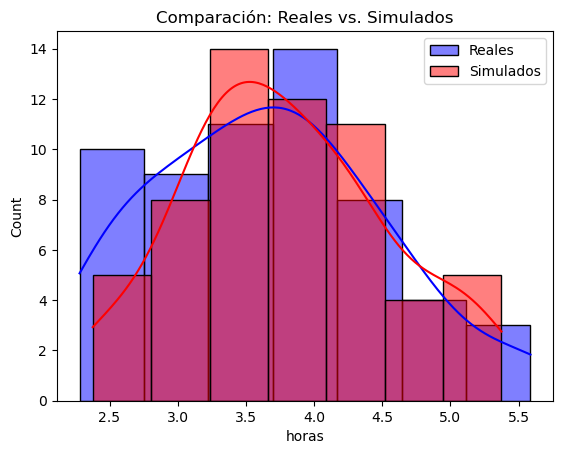

In [11]:
# 7. Simulación de distribución normal para comparación
simulados = np.random.normal(horas.mean(), horas.std(), len(horas))

sns.histplot(horas, color='blue', label='Reales', kde=True)
sns.histplot(simulados, color='red', label='Simulados', kde=True)
plt.title("Comparación: Reales vs. Simulados")
plt.legend()
plt.show()

## 8. Conclusiones

Con base en los gráficos, análisis descriptivos y las pruebas estadísticas, se concluye que...

*(Aquí  debe redactar sus conclusiones sobre la normalidad de los datos, su posible aplicación en modelos estadísticos y la utilidad del análisis realizado.)*